<a href="https://colab.research.google.com/github/amanmehra-23/AirBnB-price-prediction/blob/main/AirBnB_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading The Dataset


Aman Mehra 60009220216. D12

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex
from sklearn.impute import SimpleImputer
from opencage.geocoder import OpenCageGeocode
import folium
import warnings
warnings.simplefilter('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Airbnb/Airbnb_Data.csv")

In [ ]:
df.shape

(74111, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [ ]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [ ]:
df.nunique()

id                        74111
log_price                   767
property_type                35
room_type                     3
amenities                 67122
accommodates                 16
bathrooms                    17
bed_type                      5
cancellation_policy           5
cleaning_fee                  2
city                          6
description               73479
first_review               2554
host_has_profile_pic          2
host_identity_verified        2
host_response_rate           80
host_since                 3087
instant_bookable              2
last_review                1371
latitude                  74111
longitude                 74111
name                      73359
neighbourhood               619
number_of_reviews           371
review_scores_rating         54
thumbnail_url             65883
zipcode                     769
bedrooms                     11
beds                         18
dtype: int64

In [ ]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [ ]:
df.isna().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     966
bedrooms                     91
beds                        131
dtype: int64

Handeling Missing Data

In [ ]:
df.drop("thumbnail_url",axis=1, inplace=True)

<Axes: xlabel='bathrooms', ylabel='Density'>

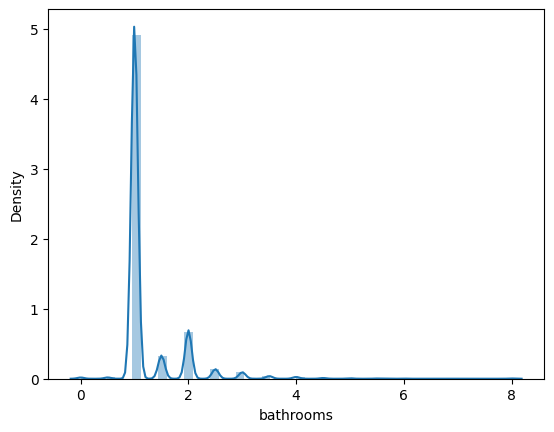

In [ ]:
sns.distplot(df["bathrooms"])

In [ ]:
df["bathrooms"] = df["bathrooms"].fillna(df["bathrooms"].mode()[0])

<Axes: xlabel='beds', ylabel='Density'>

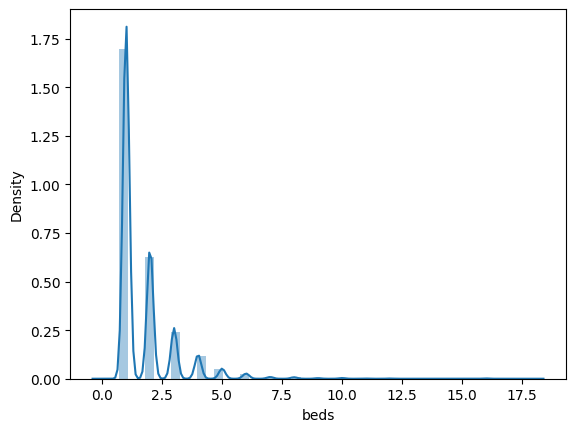

In [ ]:
sns.distplot(df["beds"])

In [ ]:
df["beds"] = df["beds"].fillna((df["bathrooms"].median()))

In [ ]:
df.host_since.fillna(method="ffill",inplace=True)

In [ ]:
df.first_review.fillna(method="ffill",inplace=True)

In [ ]:
df.host_identity_verified.fillna(method="ffill",inplace=True)

In [ ]:
df.host_has_profile_pic.fillna(method="ffill",inplace=True)

In [ ]:
df.last_review.fillna(method="ffill",inplace=True)

<Axes: xlabel='review_scores_rating', ylabel='Density'>

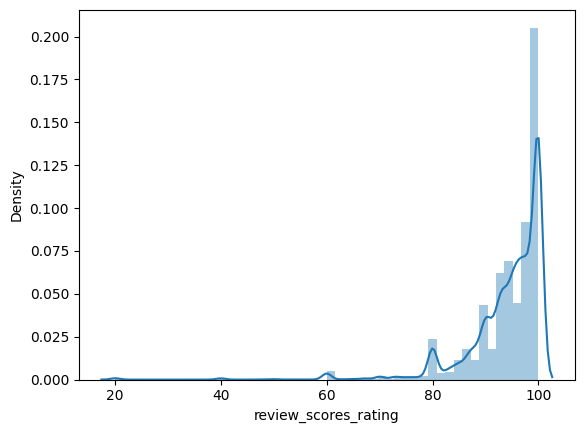

In [ ]:
sns.distplot(df["review_scores_rating"])

In [ ]:
df["review_scores_rating"] = df["review_scores_rating"].fillna(0)


<Axes: xlabel='bedrooms', ylabel='Density'>

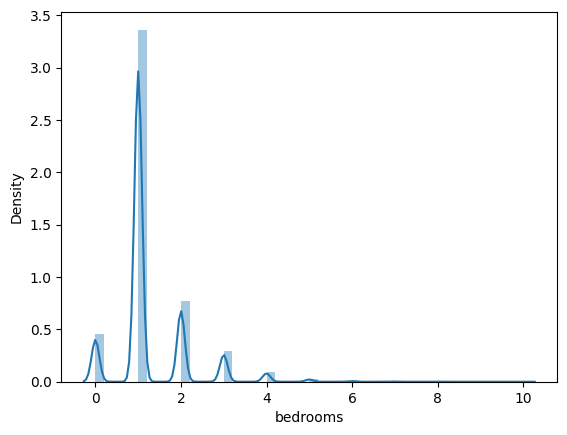

In [ ]:
sns.distplot(df["bedrooms"])

In [ ]:
df["bedrooms"] = df['bedrooms'].fillna((df["bathrooms"].median()))

In [ ]:
grouped_data = df.groupby("neighbourhood")["zipcode"]

for neighborhood, zipcodes in grouped_data:
    print("Neighborhood:", neighborhood)
    print("Zip Codes:", zipcodes.unique())
    print()


Neighborhood: 16th Street Heights
Zip Codes: ['20010' '20011']

Neighborhood: Adams Morgan
Zip Codes: ['20009' '20008']

Neighborhood: Alamo Square
Zip Codes: ['94117.0' '94115' '94115.0' '94117' '94114.0' nan]

Neighborhood: Albany Park
Zip Codes: ['60625' '60630' '60618']

Neighborhood: Alhambra
Zip Codes: ['91803' '91801']

Neighborhood: Allerton
Zip Codes: ['10467.0' '10467' '10469']

Neighborhood: Allston-Brighton
Zip Codes: ['02134' '02135' '02215' '02163' nan '02115' '02114']

Neighborhood: Alondra Park
Zip Codes: ['90260' '90249']

Neighborhood: Alphabet City
Zip Codes: ['10009.0' '10002.0' '10009' nan '10002' '10065.0' '10003']

Neighborhood: Altadena
Zip Codes: ['91001' '91104' '91107' '91001-2243']

Neighborhood: American University Park
Zip Codes: ['20016' '20816']

Neighborhood: Anacostia
Zip Codes: ['20020']

Neighborhood: Andersonville
Zip Codes: ['60640' '60660']

Neighborhood: Annadale
Zip Codes: ['10312']

Neighborhood: Arboretum
Zip Codes: ['20002']

Neighborhood: Ar

In [ ]:
df = df.dropna(subset=['neighbourhood'])

In [ ]:
df = df.dropna(subset=['zipcode'])

In [ ]:
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype(float)

In [ ]:
imputer = SimpleImputer(strategy='mean')
df['host_response_rate'] = imputer.fit_transform(df[['host_response_rate']])


In [ ]:
df.isna().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [ ]:
df.shape

(66660, 28)

In [ ]:
from opencage.geocoder import OpenCageGeocode
import pandas as pd


key = 'f08490f506854c33a176fb395bf6727e'
geocoder = OpenCageGeocode(key)

unique_neighborhoods = df['neighbourhood'].unique()


geocode_dict = {}
for neighborhood in unique_neighborhoods:
    try:
        result = geocoder.geocode(neighborhood, no_annotations="1")
        if result and len(result):
            latitude = result[0]['geometry']['lat']
            longitude = result[0]['geometry']['lng']
            geocode_dict[neighborhood] = (latitude, longitude)
        else:
            geocode_dict[neighborhood] = (None, None)
    except Exception as e:
        print(f"Error geocoding {neighborhood}: {e}")
        geocode_dict[neighborhood] = (None, None)

# Map the geocoded coordinates back to the DataFrame
df['latitude'] = df['neighbourhood'].map(lambda x: geocode_dict[x][0])
df['longitude'] = df['neighbourhood'].map(lambda x: geocode_dict[x][1])

print(df)


In [ ]:
df[["longitude", "latitude"]].isnull().sum()

longitude    274
latitude     274
dtype: int64

In [ ]:
df = df.dropna(subset=['longitude'])

In [ ]:
df.isnull().sum()

id                        0
log_price                 0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
first_review              0
host_has_profile_pic      0
host_identity_verified    0
host_response_rate        0
host_since                0
instant_bookable          0
last_review               0
latitude                  0
longitude                 0
name                      0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
dtype: int64

In [ ]:
df.to_csv('/content/drive/MyDrive/Airbnb/new_data.csv', index=False)

Data Visualisation